In [48]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("squircle test data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Source'] = df['Source'].fillna(0).astype(int).replace(0, pd.NA)
df

,Id,Date,Event,Group,Country,Source
0,433952333075,2023-06-13,click,Rounded rectangle,Germany,6
1,434445569649,2023-06-03,click,Squircle,Germany,1
2,434445569649,2023-06-03,purchase,Squircle,Germany,1
3,434461599357,2023-06-09,click,Rounded rectangle,Germany,1
4,434941603456,2023-06-10,click,Squircle,Turkey,1
...,...,...,...,...,...,...
257307,685139888953,2023-07-22,click,Squircle,United Arab Emirates,<NA>
257308,685245954752,2023-07-22,click,Squircle,Bahamas,<NA>
257309,685253768774,2023-07-22,click,Squircle,United States,4
257310,685321577596,2023-07-22,click,Squircle,Egypt,<NA>


In [50]:
df = pd.concat([df[df['Event'] == 'click'], 
                 df[df['Event'] == 'purchase'].drop_duplicates(subset=['Id', 'Date'], keep='first')])
df

,Id,Date,Event,Group,Country,Source
0,433952333075,2023-06-13 00:00:00,click,Rounded rectangle,Germany,6
1,434445569649,2023-06-03 00:00:00,click,Squircle,Germany,1
3,434461599357,2023-06-09 00:00:00,click,Rounded rectangle,Germany,1
4,434941603456,2023-06-10 00:00:00,click,Squircle,Turkey,1
5,434941603456,2023-06-30 00:00:00,click,Squircle,Turkey,1
...,...,...,...,...,...,...
257014,676641371943,2023-07-09 00:00:00,purchase,Rounded rectangle,United States,6
257025,676748070437,2023-07-09 00:00:00,purchase,Rounded rectangle,United States,6
257075,677260204167,2023-07-10 00:00:00,purchase,Squircle,United States,6
257172,679588888559,2023-07-14 05:23:01,purchase,Rounded rectangle,United Kingdom,1


In [51]:
id_list = pd.merge(df[df["Group"]=="Squircle"], df[df["Group"]=="Rounded rectangle"], on='Id', how='inner')["Id"].to_list()
df = df[~(df['Id'].isin(id_list))]
df

,Id,Date,Event,Group,Country,Source
0,433952333075,2023-06-13 00:00:00,click,Rounded rectangle,Germany,6
1,434445569649,2023-06-03 00:00:00,click,Squircle,Germany,1
3,434461599357,2023-06-09 00:00:00,click,Rounded rectangle,Germany,1
4,434941603456,2023-06-10 00:00:00,click,Squircle,Turkey,1
5,434941603456,2023-06-30 00:00:00,click,Squircle,Turkey,1
...,...,...,...,...,...,...
257014,676641371943,2023-07-09 00:00:00,purchase,Rounded rectangle,United States,6
257025,676748070437,2023-07-09 00:00:00,purchase,Rounded rectangle,United States,6
257075,677260204167,2023-07-10 00:00:00,purchase,Squircle,United States,6
257172,679588888559,2023-07-14 05:23:01,purchase,Rounded rectangle,United Kingdom,1


In [52]:
df1 = df.copy()

In [53]:
df1.groupby(['Group', 'Event']).count()

Id    Date  Country  Source
Group             Event                                    
Rounded rectangle click     123366  123366   123366  116352
                  purchase    3565    3565     3565    3398
Squircle          click     124883  124883   124883  117273
                  purchase    3725    3725     3725    3561

In [54]:
df1.groupby(['Group', 'Event']).nunique()

Id  Date  Country  Source
Group             Event                                  
Rounded rectangle click     105771    51      212      10
                  purchase    3558   672      108      10
Squircle          click     106631    51      213      10
                  purchase    3714   702      105      10

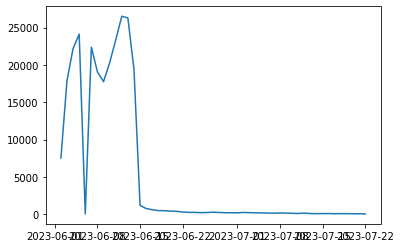

In [55]:
df2 = df1.copy()
df2['Date'] = df2['Date'].dt.date
df2 = df2.groupby(['Date'])
df2.count()
x = df2.count().index
y = df2.count()['Id']

plt.plot(x, y)

# df[df['Date'].dt.date == pd.to_datetime('2023-6-6')]

In [56]:
df2 = df1.groupby(['Group', 'Event']).count()['Id'].unstack()
df2['Conversion'] = df2['purchase'] / df2['click']
df2.reset_index(inplace=True)
df2.rename(columns={'click': 'Click Count', 'purchase': 'Purchase Count'}, inplace=True)
df2

Event,Group,Click Count,Purchase Count,Conversion
0,Rounded rectangle,123366,3565,0.028898
1,Squircle,124883,3725,0.029828


In [57]:
df2 = df1.copy()
df2['Date'] = df2['Date'].dt.date
df2 = df2.groupby(['Date', 'Group', 'Event']).count()['Id'].unstack()
df2['Conversion'] = df2['purchase'] / df2['click']
df2.reset_index(inplace=True)
df2.rename(columns={'click': 'Click Count', 'purchase': 'Purchase Count'}, inplace=True)
df2 = df2.fillna(0)
df2

Event,Date,Group,Click Count,Purchase Count,Conversion
0,2023-06-02,Rounded rectangle,3613.0,116.0,0.032106
1,2023-06-02,Squircle,3676.0,119.0,0.032372
2,2023-06-03,Rounded rectangle,8532.0,258.0,0.030239
3,2023-06-03,Squircle,8846.0,281.0,0.031766
4,2023-06-04,Rounded rectangle,10787.0,332.0,0.030778
...,...,...,...,...,...
97,2023-07-20,Squircle,22.0,0.0,0.000000
98,2023-07-21,Rounded rectangle,27.0,2.0,0.074074
99,2023-07-21,Squircle,22.0,0.0,0.000000
100,2023-07-22,Rounded rectangle,8.0,1.0,0.125000


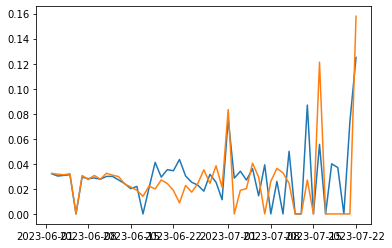

In [58]:
x = df2[df2['Group'] == 'Rounded rectangle']['Date']
y = df2[df2['Group'] == 'Rounded rectangle']['Conversion']

x1 = df2[df2['Group'] == 'Squircle']['Date']
y1 = df2[df2['Group'] == 'Squircle']['Conversion']

# fig, axs = plt.subplot()

plt.plot(x, y)
plt.plot(x1, y1)

C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


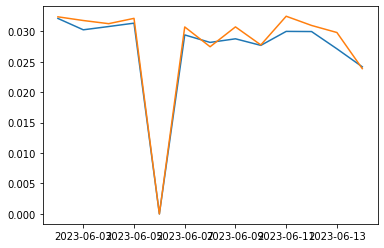

In [59]:
df2 = df2[(df2['Date'] >= pd.to_datetime('2023-06-01')) & (df2['Date'] <= pd.to_datetime('2023-06-14'))]
x = df2[df2['Group'] == 'Rounded rectangle']['Date']
y = df2[df2['Group'] == 'Rounded rectangle']['Conversion']

x1 = df2[df2['Group'] == 'Squircle']['Date']
y1 = df2[df2['Group'] == 'Squircle']['Conversion']

# fig, axs = plt.subplot()

plt.plot(x, y)
plt.plot(x1, y1)

In [60]:
df2 = df1.groupby(['Group', 'Event']).count()['Id'].unstack()
df2['Conversion'] = df2['purchase'] / df2['click']
df2.reset_index(inplace=True)
df2.rename(columns={'click': 'Click Count', 'purchase': 'Purchase Count'}, inplace=True)
df2

Event,Group,Click Count,Purchase Count,Conversion
0,Rounded rectangle,123366,3565,0.028898
1,Squircle,124883,3725,0.029828


In [61]:
df2 = df1.copy()
df2['Date'] = df2['Date'].dt.date
df2 = df2.fillna(0)
df2 = df2.groupby(['Date', 'Group', 'Event']).count()['Id'].unstack().fillna(0).unstack().cumsum().stack(['Group'])
df2['Conversion'] = df2['purchase'] / df2['click']
df2.reset_index(inplace=True)
df2.rename(columns={'click': 'Click Count', 'purchase': 'Purchase Count'}, inplace=True)
df2

Event,Date,Group,Click Count,Purchase Count,Conversion
0,2023-06-02,Rounded rectangle,3613.0,116.0,0.032106
1,2023-06-02,Squircle,3676.0,119.0,0.032372
2,2023-06-03,Rounded rectangle,12145.0,374.0,0.030795
3,2023-06-03,Squircle,12522.0,400.0,0.031944
4,2023-06-04,Rounded rectangle,22932.0,706.0,0.030787
...,...,...,...,...,...
97,2023-07-20,Squircle,124842.0,3722.0,0.029814
98,2023-07-21,Rounded rectangle,123358.0,3564.0,0.028892
99,2023-07-21,Squircle,124864.0,3722.0,0.029808
100,2023-07-22,Rounded rectangle,123366.0,3565.0,0.028898


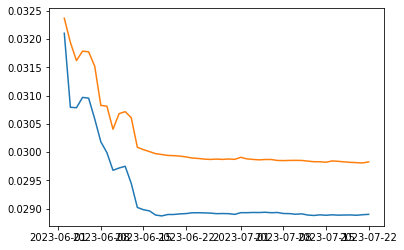

In [62]:
x = df2[df2['Group'] == 'Rounded rectangle']['Date']
y = df2[df2['Group'] == 'Rounded rectangle']['Conversion']

x1 = df2[df2['Group'] == 'Squircle']['Date']
y1 = df2[df2['Group'] == 'Squircle']['Conversion']

# fig, axs = plt.subplot()

plt.plot(x, y)
plt.plot(x1, y1)

In [63]:
from statsmodels.stats.proportion import proportions_ztest

df3 = df2.groupby(['Date'])

dates = []
p_values = []
for group, data in df3:
    dates.append(group)
    n_a = data.iloc[0, 2]
    n_b = data.iloc[1, 2]
    conv_a = data.iloc[0, 3]
    conv_b = data.iloc[1, 3]
    p_values.append(proportions_ztest([conv_a, conv_b], [n_a, n_b])[1])
print(dates)
print(p_values)

with open("squircle p-values.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for date, p in zip(dates, p_values):
        writer.writerow([date, p])

[datetime.date(2023, 6, 2), datetime.date(2023, 6, 3), datetime.date(2023, 6, 4), datetime.date(2023, 6, 5), datetime.date(2023, 6, 6), datetime.date(2023, 6, 7), datetime.date(2023, 6, 8), datetime.date(2023, 6, 9), datetime.date(2023, 6, 10), datetime.date(2023, 6, 11), datetime.date(2023, 6, 12), datetime.date(2023, 6, 13), datetime.date(2023, 6, 14), datetime.date(2023, 6, 15), datetime.date(2023, 6, 16), datetime.date(2023, 6, 17), datetime.date(2023, 6, 18), datetime.date(2023, 6, 19), datetime.date(2023, 6, 20), datetime.date(2023, 6, 21), datetime.date(2023, 6, 22), datetime.date(2023, 6, 23), datetime.date(2023, 6, 24), datetime.date(2023, 6, 25), datetime.date(2023, 6, 26), datetime.date(2023, 6, 27), datetime.date(2023, 6, 28), datetime.date(2023, 6, 29), datetime.date(2023, 6, 30), datetime.date(2023, 7, 1), datetime.date(2023, 7, 2), datetime.date(2023, 7, 3), datetime.date(2023, 7, 4), datetime.date(2023, 7, 5), datetime.date(2023, 7, 6), datetime.date(2023, 7, 7), dateti